In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255


In [24]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Building keras Functional API Model for mnist data

In [25]:
inputs = keras.Input(shape=(784,)) #input layer

dense = layers.Dense(64, activation="relu") #first hidden dense layer
x = dense(inputs)

x = layers.Dense(64, activation="relu")(x) #second hidden dense layer

outputs = layers.Dense(10)(x) #output layer

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [26]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


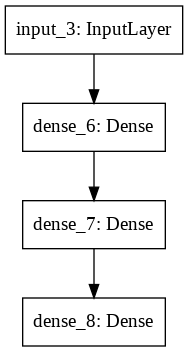

In [27]:
keras.utils.plot_model(model, "my_first_model.png")

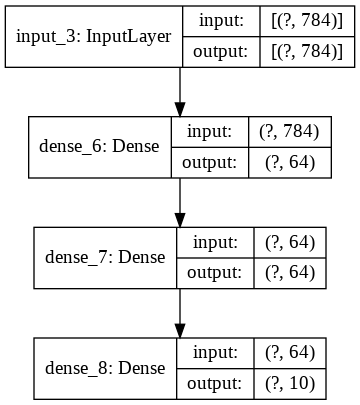

In [28]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

Compile the mode

In [29]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

Model training

In [30]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3352 - accuracy: 0.9051 - val_loss: 0.1844 - val_accuracy: 0.9466
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1541 - accuracy: 0.9541 - val_loss: 0.1371 - val_accuracy: 0.9595
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1119 - accuracy: 0.9661 - val_loss: 0.1221 - val_accuracy: 0.9640
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0910 - accuracy: 0.9728 - val_loss: 0.1141 - val_accuracy: 0.9682
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0755 - accuracy: 0.9771 - val_loss: 0.1062 - val_accuracy: 0.9697
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.1104 - val_accuracy: 0.9697
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0566 - accuracy: 0.9827 - val_loss: 0.1047 - val_accuracy: 0.9719
Epoch 

In [31]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.1131 - accuracy: 0.9709
Test loss: 0.11314547061920166
Test accuracy: 0.9708999991416931
